In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('Diabetics_Prediction.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [3]:
df.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[5 rows x 22 columns]

# data information

| Feature explanation                            | Feature                                     | Values                                             |
| --------------------------------------------- | ------------------------------------------- | -------------------------------------------------- |
| Diabetes_binary                                | diabetes                                    | 0 = no, 1 = yes                                    |
| HighBP                                         | high BP                                     | 0 = no, 1 = yes                                    |
| HighChol                                       | high cholesterol                            | 0 = no, 1 = high cholesterol                       |
| CholCheck                                      | cholesterol check in 5 years                | 0 = no, 1 = yes                                    |
| BMI                                           | Body Mass Index                             |                                                    |
| Smoker                                        | Have you smoked at least 100 cigarettes...  | 0 = no, 1 = yes                                    |
| Stroke (Ever told)                            | you had a stroke.                           | 0 = no, 1 = yes                                    |
| HeartDiseaseorAttack                          | coronary heart disease (CHD) or myocard...  | 0 = no, 1 = yes                                    |
| PhysActivity                                  | physical activity in past 30 days - not...  | 0 = no, 1 = yes                                    |
| Fruits                                        | Consume Fruit 1 or more times per day      | 0 = no, 1 = yes                                    |
| Veggies                                       | Consume Vegetables 1 or more times per day | 0 = no, 1 = yes                                    |
| HvyAlcoholConsump                             | (adult men >=14 drinks per week and adul...  | 0 = no, 1 = yes                                    |
| AnyHealthcare                                 | Have any kind of health care coverage, i...  | 0 = no, 1 = yes                                    |
| NoDocbcCost                                   | Was there a time in the past 12 months ...  | 0 = no, 1 = yes                                    |
| GenHlth                                       | Would you say that in general your heal...  | 1 = excellent, 2 = very good, 3 = good, 4 = f... |
| MentHlth                                      | days of poor mental health scale 1-30 days  | 1-30                                               |
| PhysHlth                                      | physical illness or injury days in past...  | 1-30                                               |
| DiffWalk                                      | Do you have serious difficulty walking ...  | 0 = no, 1 = yes                                    |
| Sex                                           | Gender                                      | 0 = female, 1 = male                              |
| Age                                           | 13-level age category (_AGEG5YR see code...  | 1 = 18-24, 9 = 60-64, 13 = 80 or older             |
| Education                                     | Education level (EDUCA see codebook)        | scale 1-6, 1 = Never attended school or onl...    |
| Income                                        | Income scale (INCOME2 see codebook)         | scale 1-8, 1 = less than 10,000, 5 = less th...    |


In [4]:
df.shape

(253680, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [7]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
df.duplicated().sum()

24206

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(229474, 22)

In [11]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

Diabetes_binary 
 Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64
------------------------------------------------------------------------------------------
HighBP 
 HighBP
0.0    125214
1.0    104260
Name: count, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 HighChol
0.0    128129
1.0    101345
Name: count, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 CholCheck
1.0    220176
0.0      9298
Name: count, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 BMI
27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 Smoker
0.0    122585
1.0  

In [12]:
df.describe(include='all').T

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       229474.0   0.152945  0.359936   0.0   0.0   0.0   0.0   
HighBP                229474.0   0.454343  0.497912   0.0   0.0   0.0   1.0   
HighChol              229474.0   0.441640  0.496584   0.0   0.0   0.0   1.0   
CholCheck             229474.0   0.959481  0.197173   0.0   1.0   1.0   1.0   
BMI                   229474.0  28.687507  6.789204  12.0  24.0  27.0  32.0   
Smoker                229474.0   0.465800  0.498830   0.0   0.0   0.0   1.0   
Stroke                229474.0   0.044816  0.206899   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  229474.0   0.103336  0.304398   0.0   0.0   0.0   0.0   
PhysActivity          229474.0   0.733042  0.442371   0.0   0.0   1.0   1.0   
Fruits                229474.0   0.612675  0.487140   0.0   0.0   1.0   1.0   
Veggies               229474.0   0.794587  0.404004   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     229474.0   0.060791  0.238947   0.0   0.0   0.0   0.0   
AnyHealthcare         229474.0   0.946011  0.225996   0.0   1.0   1.0   1.0   
NoDocbcCost           229474.0   0.092921  0.290323   0.0   0.0   0.0   0.0   
GenHlth               229474.0   2.601820  1.064962   1.0   2.0   3.0   3.0   
MentHlth              229474.0   3.509866  7.717643   0.0   0.0   0.0   2.0   
PhysHlth              229474.0   4.681219  9.050877   0.0   0.0   0.0   4.0   
DiffWalk              229474.0   0.185751  0.388906   0.0   0.0   0.0   0.0   
Sex                   229474.0   0.439087  0.496277   0.0   0.0   0.0   1.0   
Age                   229474.0   8.085068  3.094451   1.0   6.0   8.0  10.0   
Education             229474.0   4.979741  0.992989   1.0   4.0   5.0   6.0   
Income                229474.0   5.888615  2.092888   1.0   4.0   6.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

<Axes: >

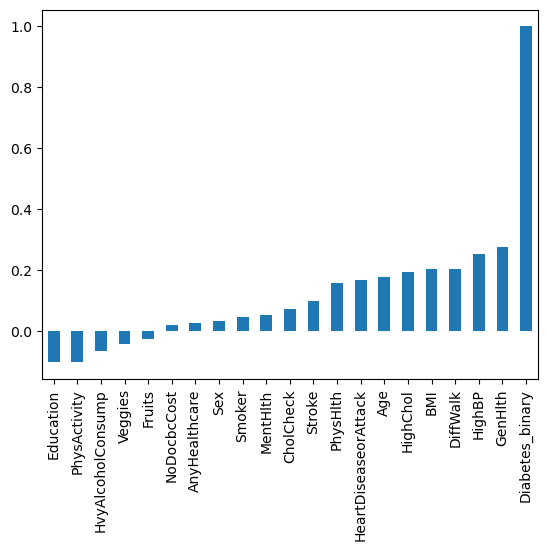

In [14]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Diabetes_binary'][:-1].sort_values().plot(kind='bar')

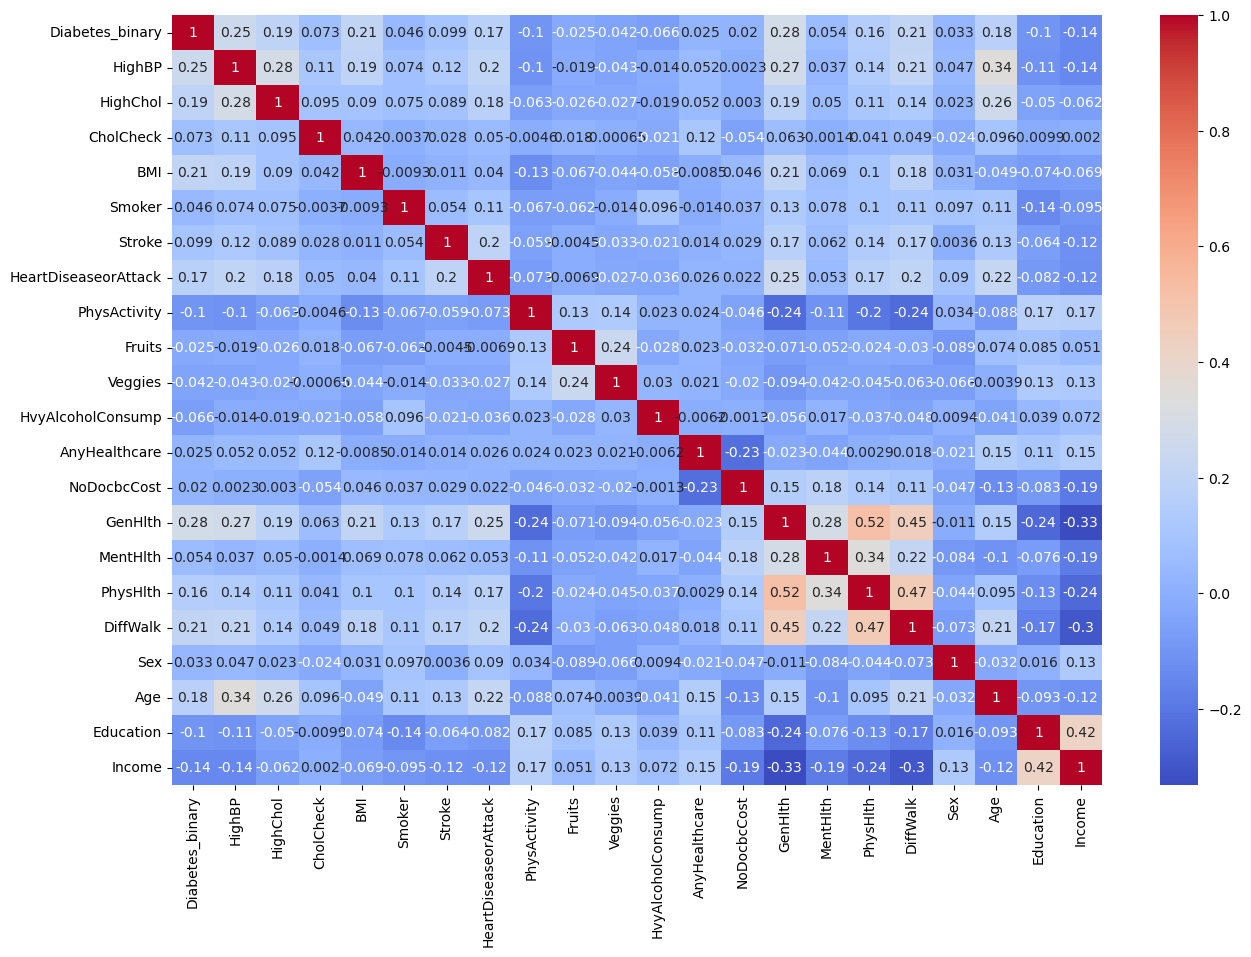

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

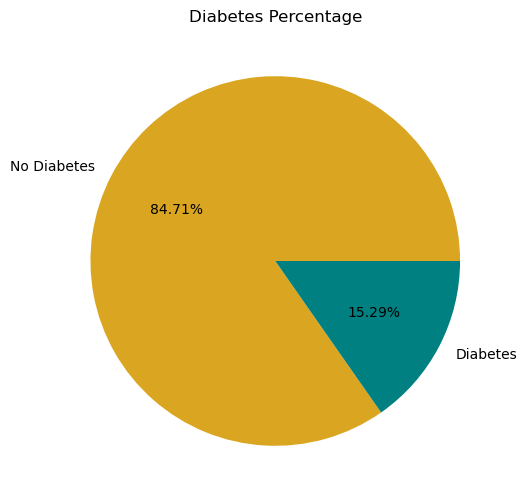

In [17]:
plt.figure(figsize=(10,6))
plt.pie(df['Diabetes_binary'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal'])
plt.title('Diabetes Percentage')
plt.show()

In [18]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [19]:
# these columns are i removed in my dataframe['Income','Education']

**Sex and Diabetes**

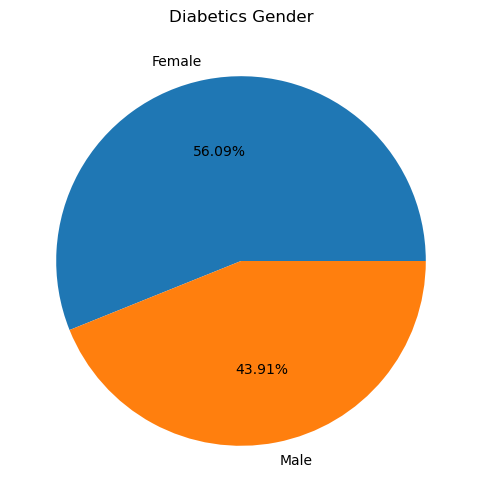

In [20]:
plt.figure(figsize=(10,6))
plt.pie(df['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Gender')
plt.show()

In [26]:
Diabetics = df.where(df.Diabetes_binary == 1)
Diabetics.dropna(inplace=True)

**High Cholesterol and Diabetes**

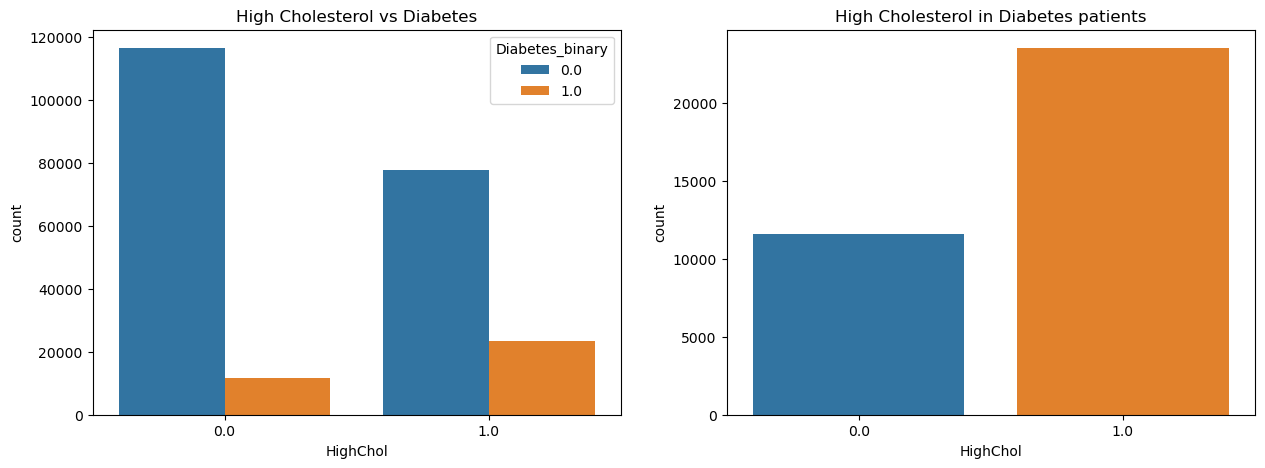

In [27]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighChol', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetes patients')
plt.show()

**Difficulty walking or climbing and Diabetes**

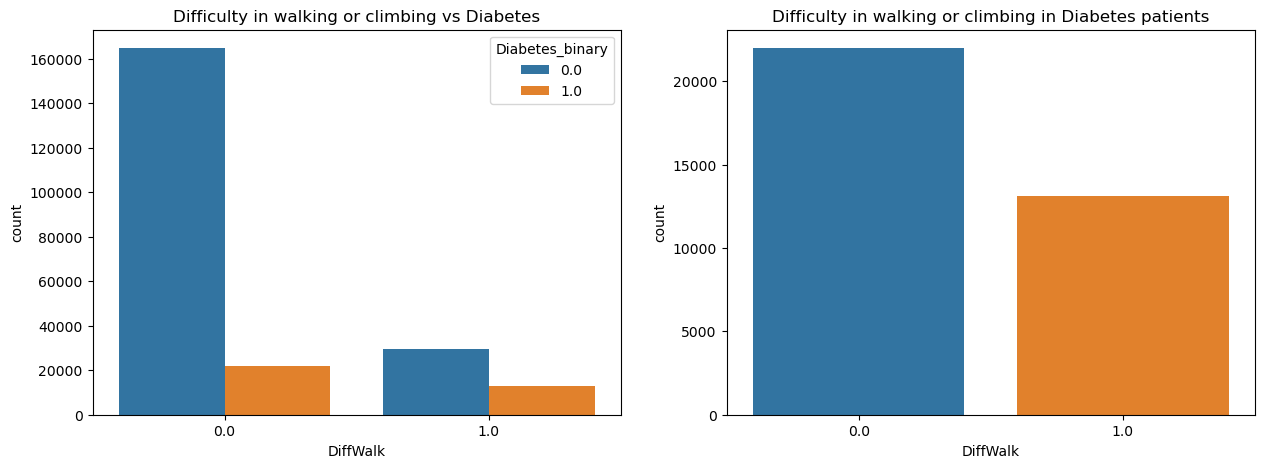

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('Difficulty in walking or climbing vs Diabetes')
sns.countplot(x='DiffWalk', data=Diabetics, ax=ax[1]).set_title('Difficulty in walking or climbing in Diabetes patients')
plt.show()

**High blood pressure and Diabetes**

Text(0.5, 1.0, 'High blood pressure in Diabetes pation')

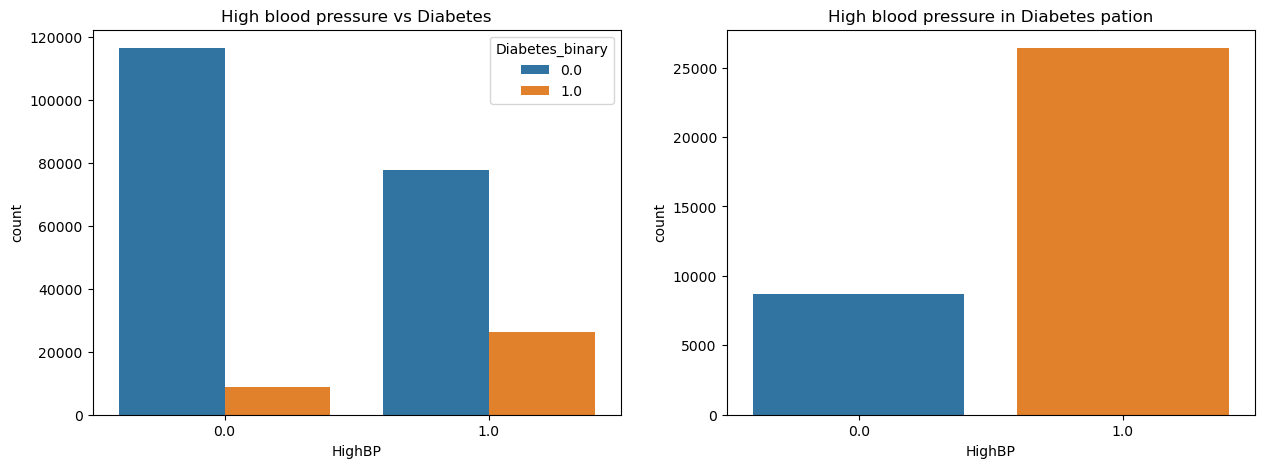

In [29]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighBP', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('High blood pressure vs Diabetes')
sns.countplot(x='HighBP', data=Diabetics, ax=ax[1]).set_title('High blood pressure in Diabetes pation')

**General Health and Diabetes**

Text(0.5, 0, 'GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

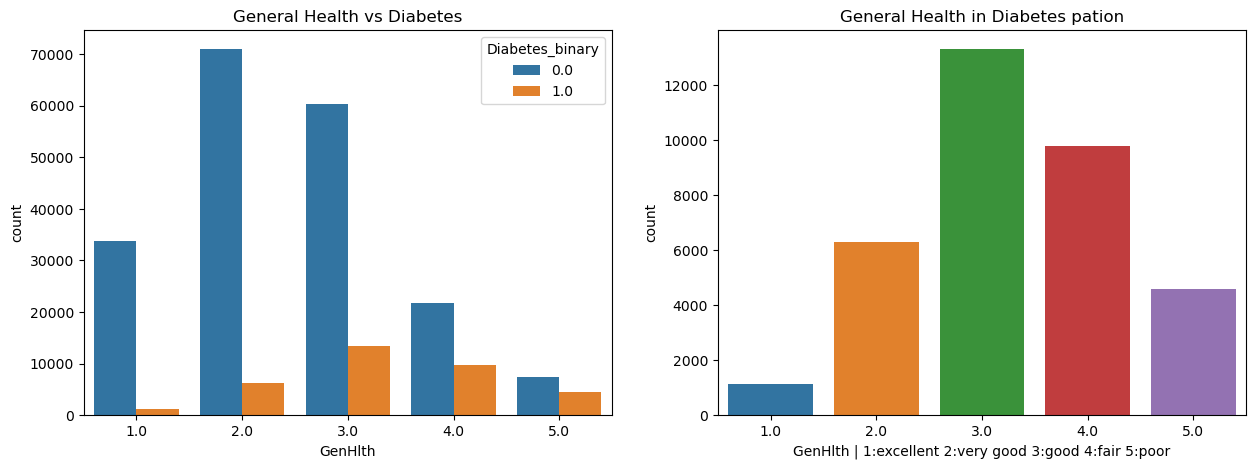

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='GenHlth', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('General Health vs Diabetes')
sns.countplot(x='GenHlth', data=Diabetics, ax=ax[1]).set_title('General Health in Diabetes pation')
plt.xlabel('GenHlth | 1:excellent 2:very good 3:good 4:fair 5:poor')

In [31]:
Diabetics['GenHlth'].value_counts().sort_values(ascending=False)

GenHlth
3.0    13324
4.0     9781
2.0     6280
5.0     4577
1.0     1135
Name: count, dtype: int64

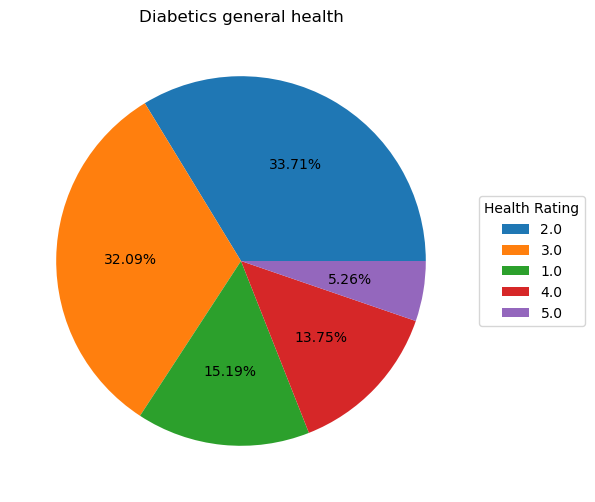

In [33]:
plt.figure(figsize=(10, 6))
plt.pie(df['GenHlth'].value_counts(), autopct='%1.2f%%')
plt.title('Diabetics general health')

# Create labels for each slice
labels = df['GenHlth'].value_counts().index.tolist()
plt.legend(labels=labels, title='Health Rating', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

**BMI and Diabetes**

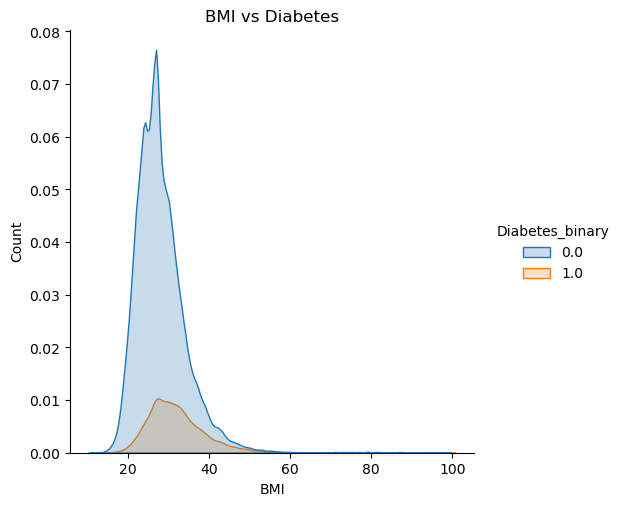

In [34]:
sns.displot(df, x="BMI", hue='Diabetes_binary', kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()


**Age and Diabetes**

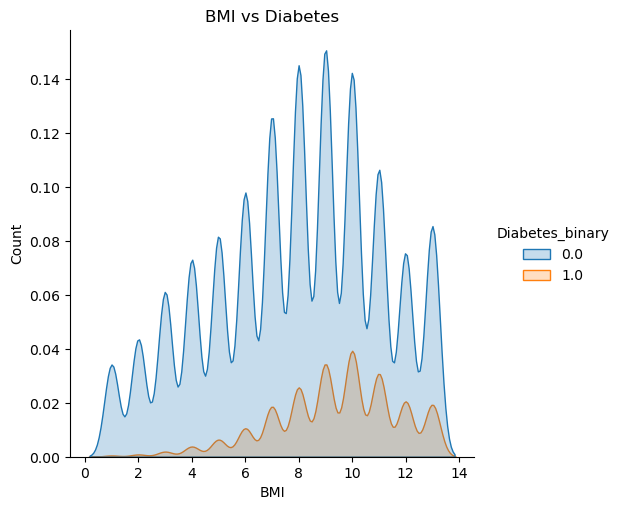

In [36]:
sns.displot(df, x="Age", hue='Diabetes_binary', kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

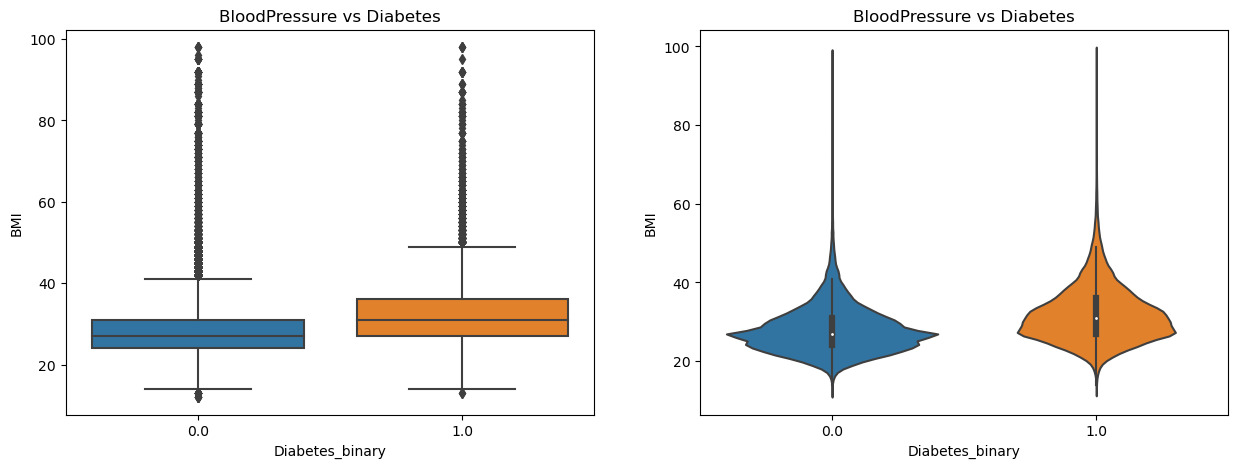

In [38]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Diabetes_binary', y='BMI', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes')
plt.show()

In [39]:
df.Age

0          9.0
1          7.0
2          9.0
3         11.0
4         11.0
          ... 
253675     5.0
253676    11.0
253677     2.0
253678     7.0
253679     9.0
Name: Age, Length: 229474, dtype: float64

# Model Building

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression

In [42]:
x=df.drop(columns='Diabetes_binary',axis=1)
y=df['Diabetes_binary']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8509905817114158
Test Accuracy Score : 0.8496786142281294
Cross validation Score : 0.8482093809456753
confusion matrix :
 [[37986   827]
 [ 6072  1010]]
classification Report :
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.55      0.14      0.23      7082

    accuracy                           0.85     45895
   macro avg       0.71      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895



# KNN

In [43]:
x=df.drop(columns='Diabetes_binary',axis=1)
y=df['Diabetes_binary']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=KNeighborsClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8751763545939351
Test Accuracy Score : 0.8304826233794531
Cross validation Score : nan
confusion matrix :
 [[36674  2139]
 [ 5641  1441]]
classification Report :
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     38813
         1.0       0.40      0.20      0.27      7082

    accuracy                           0.83     45895
   macro avg       0.63      0.57      0.59     45895
weighted avg       0.80      0.83      0.81     45895



# Support Vector Machine (SVM)

In [ ]:
x=df.drop(columns='Diabetes_binary',axis=1)
y=df['Diabetes_binary']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

# Conclusion

**From the exploratory data analysis, I have concluded that the risk of Diabetes depends upon the following factors:**

- **HighChol**
- **BMI**
- **DiffWalk**
- **HighBP**
- **GenHlth**

**Hence we choose logistic Regression Algorithms as a my final model for these datasets**

In [ ]:
x=df.drop(columns='Diabetes_binary',axis=1)
y=df['Diabetes_binary']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

tf1 = ColumnTransformer([('Scaler', StandardScaler(), slice(0, 20))])
tf2 = ColumnTransformer([('PCA', PCA(0.95), slice(0,20))])

tf3=LogisticRegression()
pipe=make_pipeline(tf1,tf2,tf3)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_pred,y_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('Diabetics.pkl','wb'))

In [ ]:
Diabetics_model=pickle.load(open('Diabetics.pkl','rb'))
test_input =[40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up']
test_input = np.array(test_input).reshape(1, -1)
output=Diabetics_model.predict(test_input)

if output == 1:
    print("The patient does not have Diabetics.")
else:
    print("The patient has Diabetics.")